In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/raw/hotel_booking.csv")

The descripcion of all variables can be found in the paper [Hotel booking demands](https://www.researchgate.net/publication/329286343_Hotel_booking_demand_datasets). 

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

<AxesSubplot:xlabel='hotel', ylabel='count'>

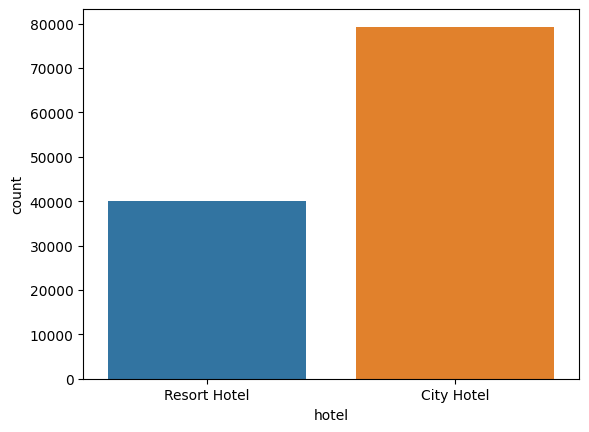

In [5]:
sns.countplot(x='hotel', data=df)

<AxesSubplot:xlabel='is_canceled', ylabel='count'>

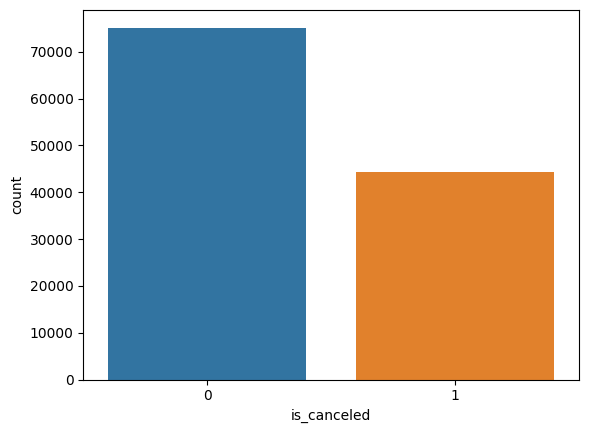

In [6]:
sns.countplot(x='is_canceled', data=df)

<AxesSubplot:xlabel='is_canceled', ylabel='count'>

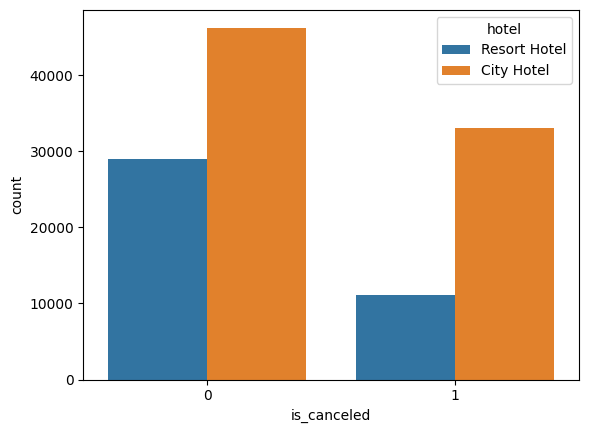

In [7]:
sns.countplot(x="is_canceled", hue="hotel", data=df)

<AxesSubplot:>

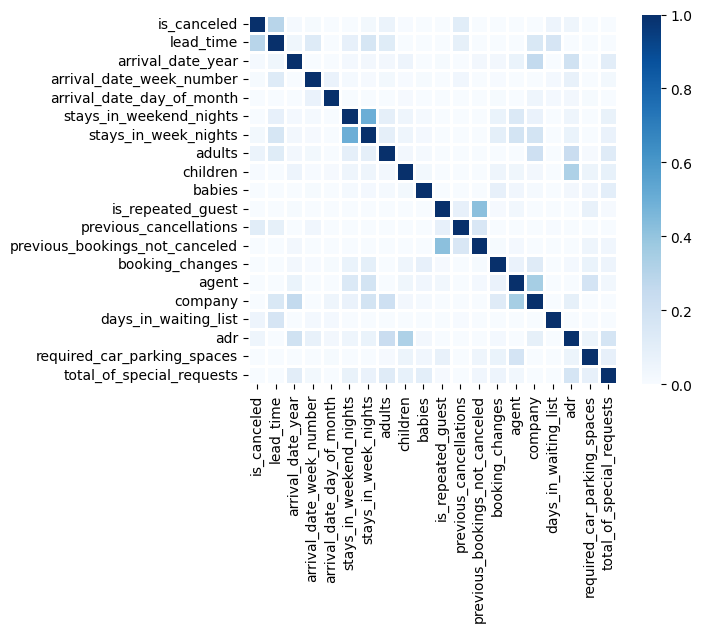

In [8]:
df_corr = df.corr()

sns.heatmap(df_corr, vmin=0, vmax=1, linewidths=2, square=True, cmap='Blues')

In [9]:
df.columns[df.isnull().any()]

Index(['children', 'country', 'agent', 'company'], dtype='object')

Possible feature engineering:

* Fill in the missing values in the three columns: children, company, agent, and country.
* How we're encoding the categorical variables.
* Drop features: hotel, phone-number, name, credit card, 

In [11]:
df.shape

(119390, 36)

In [12]:
# Split file into train and test

train = df.iloc[0:1000000, :]
test = df.iloc[1000000:, :]

train.to_csv("../data/train_test_split/train.csv", index=False)
test.to_csv("../data/train_test_split/test.csv", index=False)